<span style="font-size:larger;">**1. Description of Topic:**</span><br>
The topic that will be further analysed will be regarding weather data analytics. This dataset contains different attributes which may affect the temperature captured. 

**Purpose/Problem Statement:**<br>
In this dataset, there are multiple variables that have been collected/presented, which includes: apparent temperature, humidity, wind speed, wind bearing, visibility, loud cover and pressure, as well as other variable factors based on the 96453 observations of captured weather data. 

The purpose of this study is to predict the temperature based on the above variables using various machine learning algorithms. With multiple variables as the input (X) and a predictable integer variable as the output (Y), regression would be used to solve these type of problems, which in turn, makes this scenario a regression problem.

<span style="font-size:larger;">**2. Load the data and libraries**</span>

In [182]:
#load/Import all the relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
#Load the dataset 
df = pd.read_csv("weatherHistory.csv")

<span style="font-size:larger;">**3. Data Exploration**</span>

I will start by performing data exploration on the imported data to gain more domain 
knowledge about the dataset before cleaning the data and preparing it for supervised model building.<br>

In [185]:
# Dimension/Shape of dataset
df.shape

(96453, 12)

We get a idea of how many columns and rows we are dealing with in this dataset.

In [186]:
# Peek at data
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259,9.9820,0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279,9.9820,0,1017.22,Partly cloudy throughout the day.


From the above table, we can see that there are a number of non-numeric columns that may or may not be required for our analysis. Using feature selection in the coming sections, we'll see their relevance in our analysis. We can also see that there are no evident missing values, so it will likely make our data preparation much easier.

In [45]:
# Statistical description
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
# Categorical description
df.describe(include=['O'])

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 05:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


<span style="font-size:larger;">**3.1 Data Exploration - Visualisation**</span>

In this section I will take a look at the distribution of values for each variable. I am trying to identify any relationships between variables that are worth investigating further.

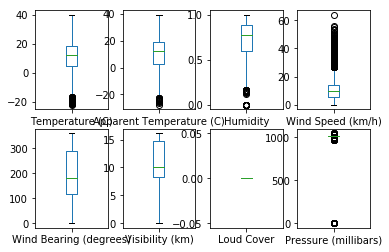

In [46]:
# Boxplot for numerical variables
df.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.show()

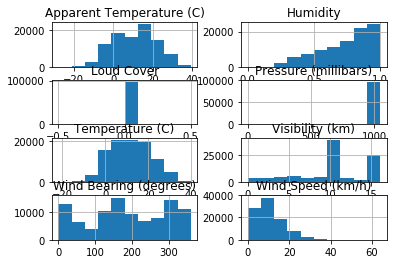

In [47]:
# Histogram for numerical variables
df.hist(layout=(4,2),sharex = False, sharey=False)
plt.show()

The histogram will basically tells more than the boxplot, showing more about the distribution of the diﬀerent numerical variables that are present within the dataset. 

From the above visualisations, we can say that for features like 'Loud Cover', it is likely not useful to help us with our analysis since it only has a single value at 0. As for other variables, they all have different distributions.

By just looking at the visualisations, it is not enough for us to know the correlation between the variables and hence, we need to use another way to find out. 

In [48]:
# Correlations between the variables
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


The visualisation above have supported my predictions that 'loud cover' does not play any role in helping with my visualisation since it does not have any correlation with other variables at all as its values only consists of zeros.

From the correlation table, the values varies between +1 to -1, +1 indicates strong positive correlation, -1 shows perfect negative relationship, and correlation of 0 means that no relationship exists between variables. 

We can see that there is a strong relationship between temperature and apparent temperature, humidity and perhaps visibility.

<span style="font-size:larger;">**4. Data Cleaning & Preparation**</span>

**4.1 Feature Engineering**

In [49]:
# Look at the table data again
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


For variables like 'Loud Cover', 'Formatted Date' and 'Daily Summary', we can say that these are the dates that are not required for our analysis. For 'Loud Cover', just as was mentioned in the previous section, it is no needed for our analysis since it once consists of zeros and have no correlation with other variables at all. For 'Formatted Date', it gives us a lot of details as to the weather changes throughout the day on a hourly basis, however such details are not required for us to find out what will are the factors that would affect the temperature. As for 'Daily Summary', it can be removed as similar details are shown in the 'Summary' column. 

In [187]:
#delete the columns that we don't want in our model
df = df.drop(['Formatted Date', 'Loud Cover', 'Daily Summary'], axis=1)
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
5,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66
6,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72
7,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84
8,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37
9,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279,9.9820,1017.22


In [188]:
# Replace categorical data with one-hot encoded data
features_df = pd.get_dummies(df, columns=['Summary', 'Precip Type'])
features_df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8,10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,13.772222,13.772222,0.72,12.5258,279,9.9820,1017.22,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [189]:
# Remove the sale price from the feature data
features_df = features_df.drop(['Temperature (C)'], axis=1)
features_df

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,7.388889,0.89,14.1197,251,15.8263,1015.13,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,7.227778,0.86,14.2646,259,15.8263,1015.63,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9.377778,0.89,3.9284,204,14.9569,1015.94,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5.944444,0.83,14.1036,269,15.8263,1016.41,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,6.977778,0.83,11.0446,259,15.8263,1016.51,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,7.111111,0.85,13.9587,258,14.9569,1016.66,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,5.522222,0.95,12.3648,259,9.9820,1016.72,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,6.527778,0.89,14.1519,260,9.9820,1016.84,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8,10.822222,0.82,11.3183,259,9.9820,1017.37,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,13.772222,0.72,12.5258,279,9.9820,1017.22,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [190]:
# Create the X and y arrays
X = features_df.values
y = df.iloc[:,2]

<span style="font-size:larger;">**5. Evaluate Algorithms**</span>

**5.1 Separate out a validation dataset**

In [191]:
#from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [192]:
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

**5.2 Build Models**

**5.2.1 Linear Regression**

In [193]:
# import the relevant libraries to do linear regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [194]:
# fit the linear regression model to the training data
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, linear_regression.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.7356


In [80]:
# Find the error rate on the test set
mse = mean_absolute_error(y_test, linear_regression.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 0.7381


**5.3.2 Gradient Boosting Regressor**

In [195]:
# Fit regression model
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(
    n_estimators=15000, #how many decision trees to build
    learning_rate=0.1,  #how much decision trees influence overall prediction
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber',
    random_state=7
)

In [196]:
gradient_boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=0.1, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=15000,
             n_iter_no_change=None, presort='auto', random_state=7,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [28]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, gradient_boosting_regressor.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.0592


In [29]:
# Find the error rate on the test set
mse = mean_absolute_error(y_test, gradient_boosting_regressor.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 0.1415


**5.3.3 Choosing the more accurate model**

After evaluating the model's performance of the one of the regresison metrics - Mean Absolute Error. We will be choosing the model - GradientBoostingRegressor for the following reasons. 

The smaller the Mean Absolute Error, the more accurate it is as this means the differences between the actual and predicted is smaller. It has a small Mean Absolute Error for both its testing and training data as compared to Linear Regression.

<span style="font-size:larger;">**6. Feature Selection**</span>

In [197]:
# import the relevant libraries
import numpy as np
from sklearn.externals import joblib

In [198]:
# These are the feature labels from our data set
feature_labels = np.array(features_df.columns)

In [199]:
# Create a numpy array based on the model's feature importances
importance = gradient_boosting_regressor.feature_importances_

In [200]:
# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()

In [201]:
# Print each feature label, from most important to least important (reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

Summary_Windy and Dry - 0.00%
Summary_Windy - 0.00%
Summary_Rain - 0.00%
Summary_Breezy and Dry - 0.00%
Summary_Humid and Overcast - 0.00%
Summary_Dangerously Windy and Partly Cloudy - 0.00%
Summary_Windy and Foggy - 0.00%
Summary_Windy and Mostly Cloudy - 0.00%
Summary_Windy and Overcast - 0.00%
Summary_Drizzle - 0.00%
Summary_Breezy - 0.00%
Summary_Light Rain - 0.00%
Summary_Breezy and Partly Cloudy - 0.00%
Summary_Windy and Partly Cloudy - 0.01%
Summary_Humid and Partly Cloudy - 0.01%
Summary_Dry and Mostly Cloudy - 0.01%
Summary_Dry - 0.01%
Summary_Humid and Mostly Cloudy - 0.01%
Summary_Breezy and Foggy - 0.01%
Summary_Dry and Partly Cloudy - 0.02%
Summary_Breezy and Mostly Cloudy - 0.03%
Summary_Breezy and Overcast - 0.04%
Summary_Clear - 0.08%
Summary_Mostly Cloudy - 0.18%
Wind Bearing (degrees) - 0.28%
Wind Speed (km/h) - 0.46%
Summary_Overcast - 0.52%
Summary_Foggy - 1.24%
Summary_Partly Cloudy - 2.04%
Pressure (millibars) - 4.78%
Visibility (km) - 6.11%
Precip Type_snow - 6.3

For those with 0%, we will be removing them from our model as it does not contribute to our predictions. By doing so, it enables the machine learning algorithm to train faster, reduces the complexity, makes it easier to interpret, and helps to improve the accuracy of a model.

In [215]:
# remove the not needed features iteratively
#features_df = features_df.drop(['Summary_Windy and Dry'],axis=1)
#features_df = features_df.drop(['Summary_Windy'],axis=1)
#features_df = features_df.drop(['Summary_Rain'],axis=1)
#features_df = features_df.drop(['Summary_Breezy and Dry'],axis=1)
#features_df = features_df.drop(['Summary_Humid and Overcast'],axis=1)
#features_df = features_df.drop(['Summary_Dangerously Windy and Partly Cloudy'],axis=1)
#features_df = features_df.drop(['Summary_Windy and Foggy'],axis=1)
#features_df = features_df.drop(['Summary_Windy and Mostly Cloudy'],axis=1)
#features_df = features_df.drop(['Summary_Windy and Overcast'],axis=1)
#features_df = features_df.drop(['Summary_Drizzle'],axis=1)
#features_df = features_df.drop(['Summary_Breezy'],axis=1)
#features_df = features_df.drop(['Summary_Light Rain'],axis=1)
#features_df = features_df.drop(['Summary_Breezy and Partly Cloudy'],axis=1)
features_df

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Clear,...,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Partly Cloudy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,7.388889,0.89,14.1197,251,15.8263,1015.13,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,7.227778,0.86,14.2646,259,15.8263,1015.63,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,9.377778,0.89,3.9284,204,14.9569,1015.94,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,5.944444,0.83,14.1036,269,15.8263,1016.41,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,6.977778,0.83,11.0446,259,15.8263,1016.51,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,7.111111,0.85,13.9587,258,14.9569,1016.66,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6,5.522222,0.95,12.3648,259,9.9820,1016.72,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,6.527778,0.89,14.1519,260,9.9820,1016.84,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,10.822222,0.82,11.3183,259,9.9820,1017.37,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9,13.772222,0.72,12.5258,279,9.9820,1017.22,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


<span style="font-size:larger;">**7. Retrain the model**</span>

**TRAINING PART 1**

In [216]:
# Create the X and y arrays
X = features_df.values
y = df.iloc[:,2]

In [217]:
# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [220]:
# Fit regression model
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(
    n_estimators=15000, #how many decision trees to build
    learning_rate=0.1,  #how much decision trees influence overall prediction
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber',
    random_state=7
)

In [221]:
gradient_boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=0.1, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=15000,
             n_iter_no_change=None, presort='auto', random_state=7,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [222]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, gradient_boosting_regressor.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.0635


In [158]:
# Find the error rate on the test set
mse = mean_absolute_error(y_test, gradient_boosting_regressor.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 0.1660


Since our number of columns have decreased, it is expected that the error rate on both the training and test set will become higher due to curse of dimensionality. Hence, we will try to fit in another value that can make the results even more better and accurate now that our dataset is no longer distracted by variables that are not useful. 

**TRAINING PART 2**

In [223]:
# Fit regression model
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(
    n_estimators=20000, #how many decision trees to build
    learning_rate=0.1,  #how much decision trees influence overall prediction
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber',
    random_state=7
)

In [224]:
gradient_boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=0.1, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=20000,
             n_iter_no_change=None, presort='auto', random_state=7,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [227]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, gradient_boosting_regressor.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.0510


In [163]:
# Find the error rate on the test set
mse = mean_absolute_error(y_test, gradient_boosting_regressor.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 0.1604


After we have manually tuned the hyper-parameters, we can see that the error rates has decreased and the accuracy has improved from before. Hence from the results, we can say that the differences between our predicted and actual value for our Y variable - temperature, is at a low rate, and that this trained model is able to predict value of temperature within 0.0510 of the actual temperature. 

<span style="font-size:larger;">**8. Making Predictions**</span>

We will be creating a html view of our dataset to get a clearer view of our final dataset.

In [170]:
import pandas
import webbrowser
import os

# create a web page view of the data
html = features_df[0:100].to_html()

filename = 'temperature.html'

#save the html to a temporary file
with open(filename, "w") as f:
    f.write(html)

full_filename = os.path.abspath(filename)
webbrowser.open("file://{}".format(full_filename))

True

In [233]:
from sklearn.externals import joblib

# For the temperature we want to value, we need to provide the features in the exact same
# arrangement as our training data set. It will also reflect changes made during feature
# engineering and selection
temperature_to_value = [
    # temperature features
    18,      # Apparent Temperature (C)
    0.4,      # Humidity
    22,   # Wind Speed (km/h)
    270,       # Wind Bearing (degrees)
    11.27,     # Visibility (km)
    1017.59,   # Pressure (millibars)
    
    # (weather) summary: choose 1
    0,         # Summary_Breezy and Foggy
    0,         # Summary_Breezy and Mostly Cloudy
    0,         # Summary_Breezy and Overcast
    0,         # Summary_Clear
    0,         # Summary_Dry
    0,         # Summary_Dry and Mostly Cloudy
    0,         # Summary_Dry and Partly Cloudy
    0,         # Summary_Foggy
    0,         # Summary_Humid and Mostly Cloudy
    0,         # Summary_Humid and Partly Cloudy
    0,         # Summary_Mostly Cloudy	
    0,         # Summary_Overcast
    1,         # Summary_Partly Cloudy
    0,         # Summary_Windy and Partly Cloudy
    
    # precipitate type: Choose only one
    0,      # Precip Type_rain
    1,      # Precip Type_snow
]

# scikit-learn assumes you want to predict the values for lots of temperature at once, so it expects an array.
# We just want to look at a single timing temperature, so it will be the only item in our array.
single_temperature_to_value = [
    temperature_to_value
]

# Run the model and make a prediction for each house in the single_temperature_to_value array
predicted_temperature_value = gradient_boosting_regressor.predict(single_temperature_to_value)

# Since we are only predicting the price of one temperature at a time, just look at the first prediction returned
predicted_value = predicted_temperature_value[0]

print("At this certain timing, it has an estimated temperature of {:,.2f}C".format(predicted_value))


At this certain timing, it has an estimated temperature of 8.47C
